In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [94]:
car = pd.read_csv(r"C:\Users\kyuva\Downloads\quikr_car.csv")

In [95]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [96]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [97]:
car.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [98]:
car['Price'].value_counts()

Price
Ask For Price    35
2,50,000         17
3,50,000         14
1,80,000         13
1,30,000         12
                 ..
7,49,999          1
11,30,000         1
10,74,999         1
3,24,999          1
5,00,001          1
Name: count, Length: 274, dtype: int64

In [99]:
car['kms_driven'].value_counts()

kms_driven
45,000 kms      30
35,000 kms      30
55,000 kms      25
50,000 kms      23
20,000 kms      22
                ..
1,03,553 kms     1
29,685 kms       1
30,874 kms       1
49,800 kms       1
1,66,000 kms     1
Name: count, Length: 258, dtype: int64

In [108]:
car = car[car['year'].astype(str).str.isnumeric()]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [101]:
car['year']=car['year'].astype(int)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [109]:
car=car[car['Price']!='Ask For Price']
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [110]:
car['Price'] = car['Price'].astype(str).str.replace(',', '').astype(int)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [111]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [105]:
car=car[car['kms_driven'].str.isnumeric()]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [113]:
car['kms_driven']=car['kms_driven'].astype(str).str.replace(',', '').astype(int)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [115]:
car=car[~car['fuel_type'].isna()]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [118]:
car.shape

(816, 6)

In [123]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [122]:
car=car.reset_index(drop=True)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [121]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [124]:
car.to_csv('Cleaned_Car_data.csv')

In [127]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [128]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [130]:
car=car[car['Price']<6000000]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [131]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [132]:
import seaborn as sns

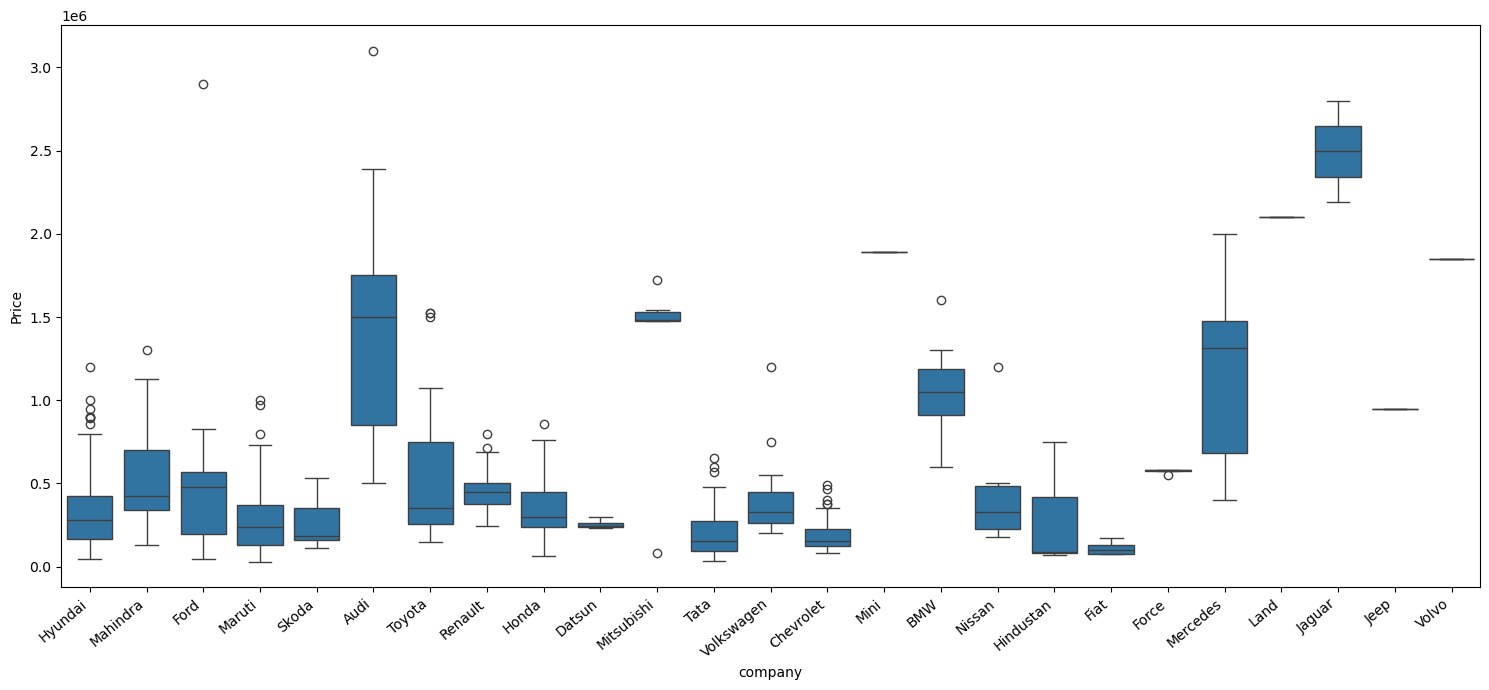

In [136]:
plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x='company', y='Price', data=car)
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

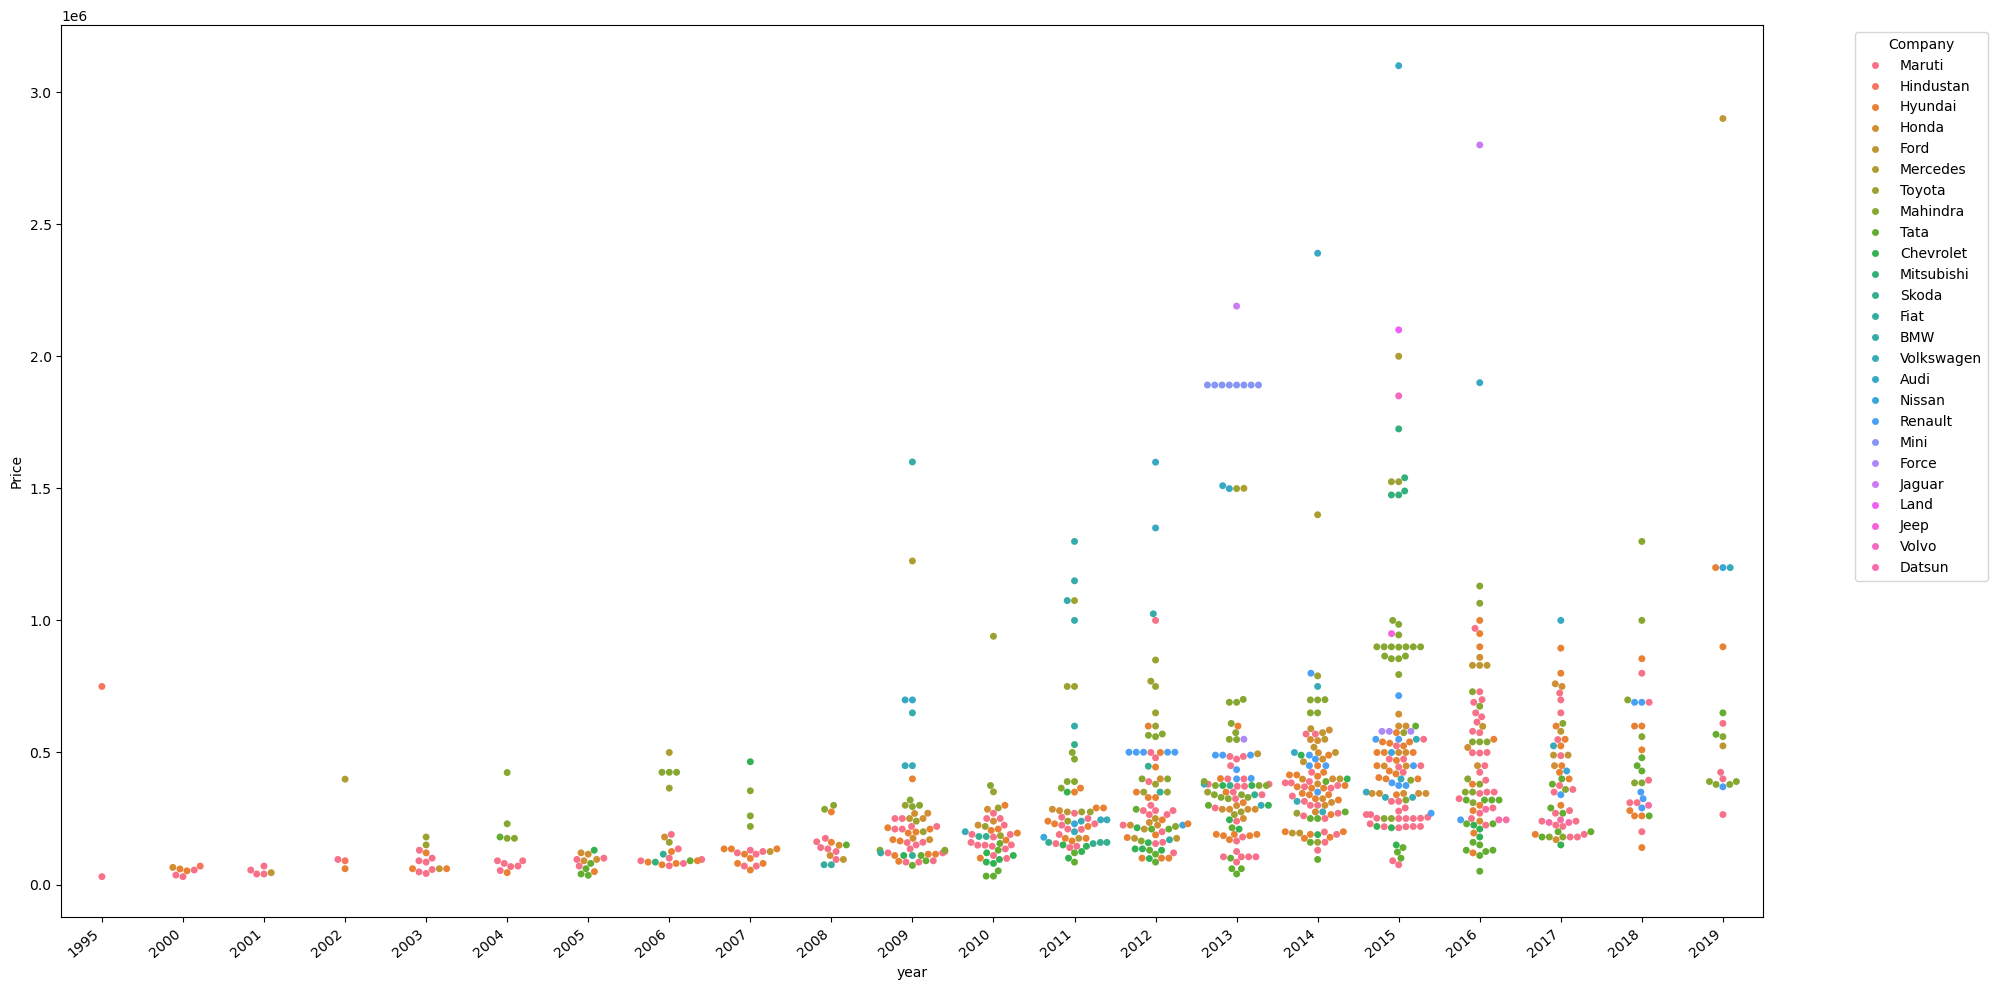

In [140]:
plt.subplots(figsize=(20, 10))
ax = sns.swarmplot(x='year', y='Price', hue='company', data=car)
plt.xticks(rotation=40, ha='right')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

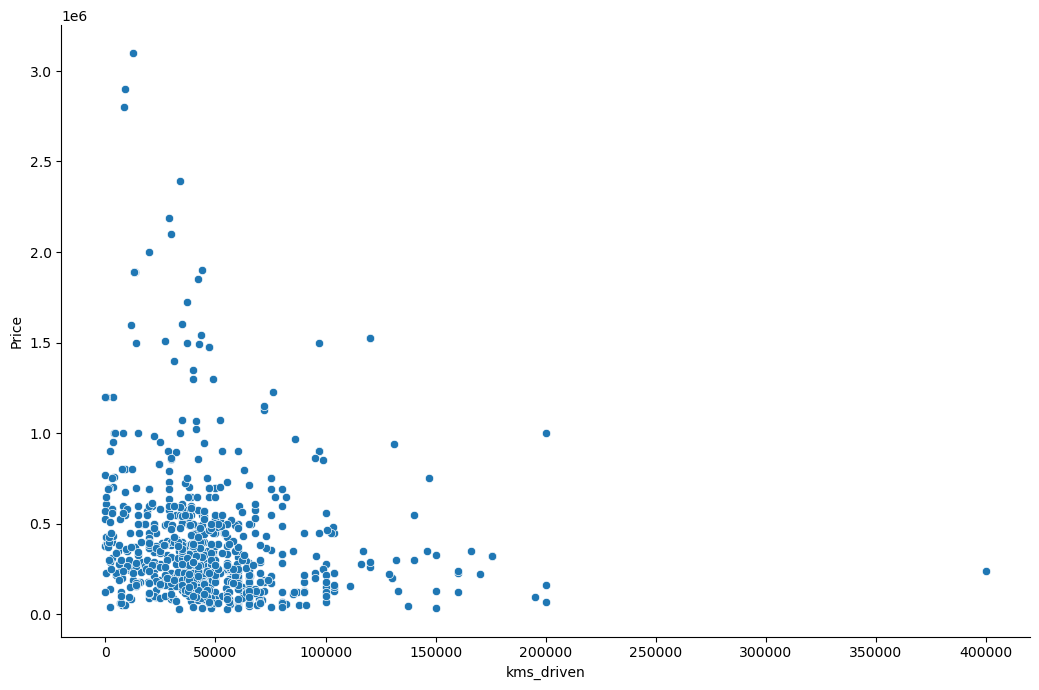

In [141]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

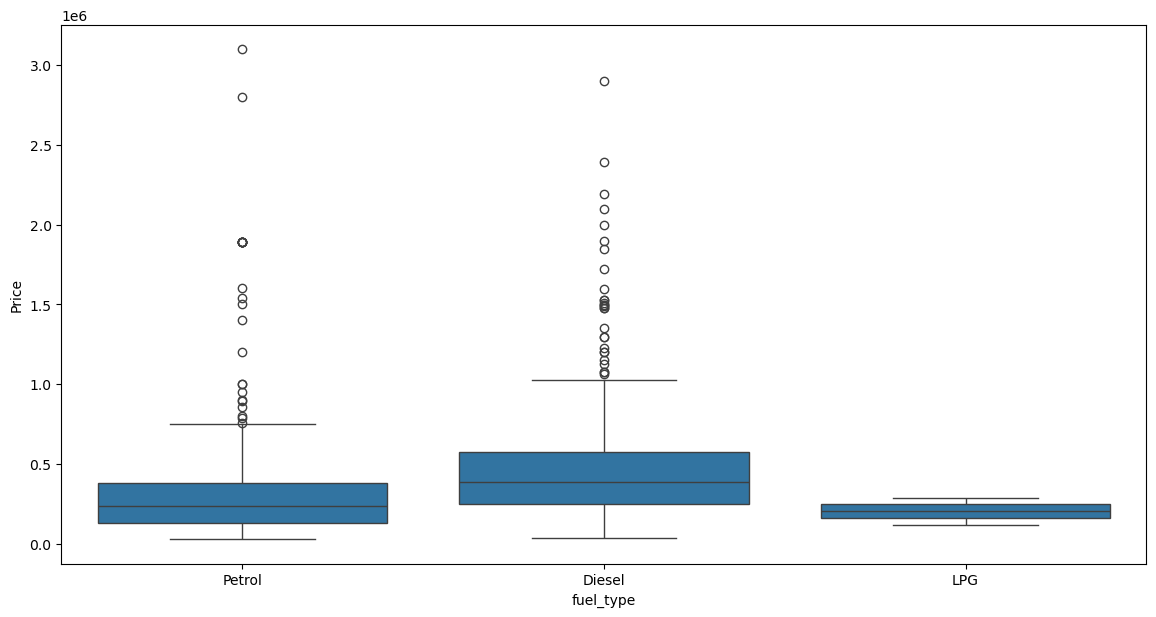

In [142]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

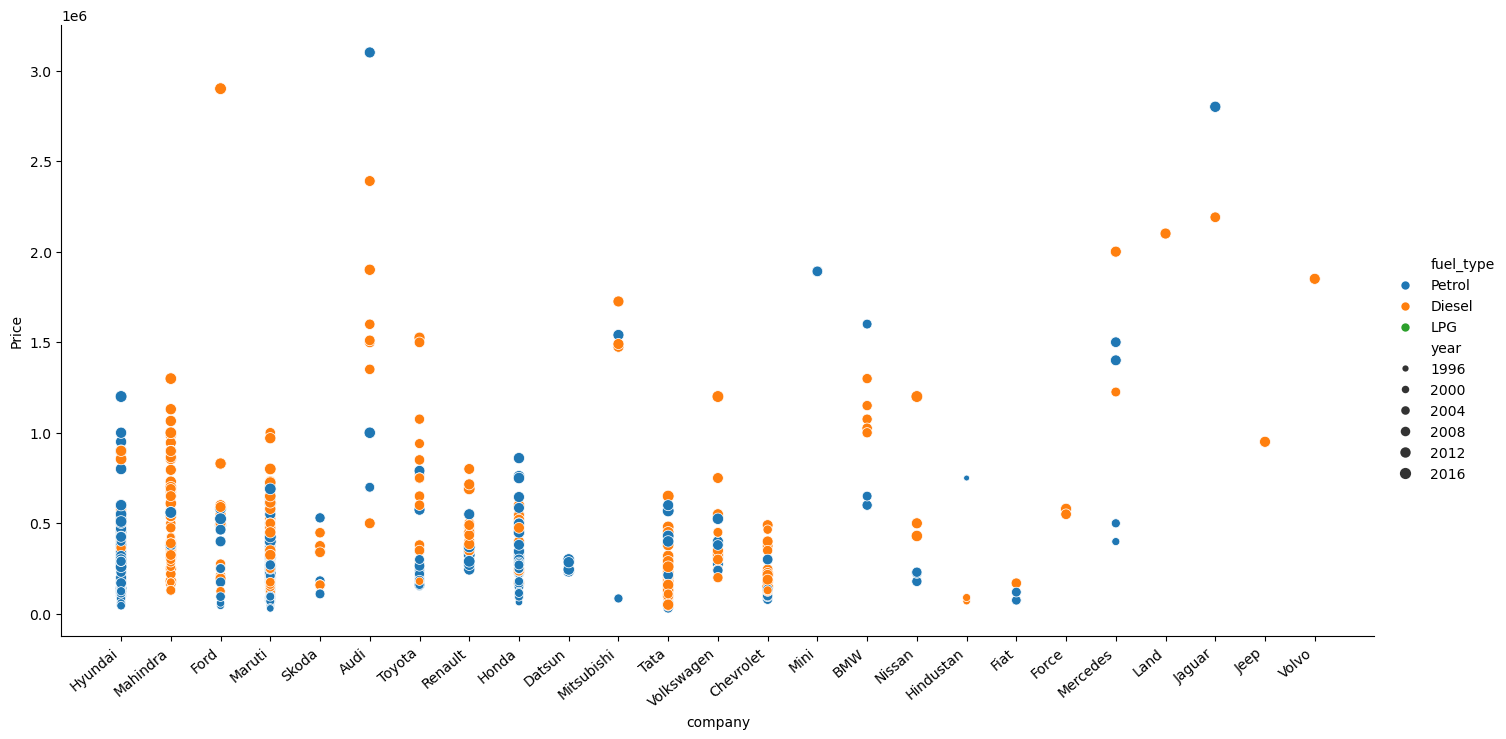

In [143]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [144]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [146]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [148]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int32

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [152]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [153]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [154]:
lr=LinearRegression()

In [155]:
pipe=make_pipeline(column_trans,lr)

In [156]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [157]:
y_pred=pipe.predict(X_test)

In [158]:
r2_score(y_test,y_pred)

0.705208601421819

In [159]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [160]:
np.argmax(scores)

302

In [162]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991138463319752

In [164]:
import pickle

In [165]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [166]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456740.35763086])

In [167]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese